# **Telco Customer Churn Project**

### Team: Team Namibia
#### Author: Brian Siaw

## Table of Contents


[**Business Understanding**](#Business-Understanding)

[**Data Understanding**](#Data-Understanding)

[**Exploratory Data Analysis**](#exploratory-data-analysis)

[**Data Preparation**](#Check-Data-Quality)

[**Hypothesis Testing**](#hypothesis-testing)

[**Analytical Questions**](#analytical-questions)
 



## Business Understanding
This project analyzes and predicts customer churn rate for a telecommunications company using Python and machine learning. Customer churn refers to the rate at which customers stop using the company's services. Identifying key factors influencing churn allows the company to implement strategies for customer retention and churn reduction.


#### Problem Statement:
The telecommunications company is experiencing a high rate of customer churn, which negatively impacts revenue and growth. Despite efforts to retain customers, the company lacks a systematic and data-driven approach to identifying the key factors driving churn and predicting which customers are most likely to leave. This project aims to address this issue by leveraging machine learning techniques to analyze customer data, identify patterns and predictors of churn, and develop a predictive model to help the company implement targeted retention strategies.



#### Goal and Objectives
##### Goal
 Identify factors contributing to customer churn and develop a predictive model to forecast churn accurately. This enables the company to take proactive measures to improve customer retention.

 ##### Objective
1. Data Collection & Cleaning: Gather and preprocess customer data from various sources.
2. Exploratory Data Analysis (EDA): Understand underlying patterns and trends in the data.
3. Feature Engineering: Create relevant features to improve the model's predictive power.
4. Model Building: Develop and train machine learning models to predict customer churn.
5. Model Evaluation: Evaluate model performance using appropriate metrics.
6. Recommendations: Provide actionable insights and recommendations to the Telco company toreduce churn.

#### Stakeholders
1. Management: Interested in overall churn rates and revenue impact.
2. Marketing Team: Needs to understand customer segments at higher churn risk.
3. Customer Service Team: Can use insights to improve customer support and retention strategies 
4. Product Development Team: Can use feedback to enhance service offerings.

#### Key Metrics and Success Criteria
#### Key Metrics:
1. Churn Rate: Percentage of customers who stop using the service within a specific period.
2. Accuracy: Proportion of correctly predicted churn vs. non-churn instances.
3. Precision & Recall: Precision measures positive prediction accuracy, while recall measures identifying actual churn cases.
4. F1 Score: Harmonic mean of precision and recall.
5. ROC-AUC: Area Under the Receiver Operating Characteristic Curve, indicating the model's ability to distinguish between classes.

#### Success Criteria:
1. Achieve a predictive model with at least 85% accuracy.
2. High precision and recall scores (above 80%).
3. Implement recommendations that result in a measurable decrease in churn rate over the next year.

#### Hypothesis (Null and Alternate)
Null Hypothesis (H0): There is no significant relationship between customer features (contract type, monthly charges, tenure, dependents, etc.) and customer churn.
Alternate Hypothesis (H1): There is a significant relationship between the selected customer features and customer churn.

#### Business Analytical Questions
1. What are the primary factors influencing customer churn in the telecommunications industry?

Objective: Identify and analyze key factors like service quality, pricing, customer service interactions, and contract types that contribute to customer churn. Look for trends and patterns in these factors to understand their impact on customer retention.

2. How does contract type affect the likelihood of customer churn?

Objective: Examine the relationship between different contract types (e.g., month-to-month, one-year, two-year contracts) and churn rates. Determine if certain contract types are associated with higher or lower churn.

3. Is there a correlation between customer service interactions and churn rates?

Objective: Investigate whether the frequency and nature of customer service interactions (e.g., number of service requests, resolution time, satisfaction levels) correlate with customer churn rates.

4. How do demographic factors (age, income) impact customer churn?

Objective: Assess the influence of demographic factors such as age and income on customer churn. Determine if certain demographic segments are more likely to churn and explore potential reasons.

5. What is the impact of monthly charges and tenure on the likelihood of a customer churning?

Objective: Analyze how monthly charges and customer tenure affect churn rates. Identify pricing thresholds that lead to higher churn and understand how customer loyalty changes over time.

6. Are specific customer segments at higher risk of churning?

Objective: Segment the customer base to identify groups at higher risk of churning. Use clustering and predictive modeling to determine high-risk segments and their characteristics.

#### Scope and Constraints
#### Scope:
Analysis limited to customer data provided by the telecommunications company.
Focus on developing a machine learning model to predict churn and providing actionable insights based on the model's findings.

#### Constraints:
1. Data availability and quality: The analysis depends on the accuracy and completeness of the customer data.
2. Resource limitations: Time and computational resources for data processing and model training.
3. Privacy concerns: Ensuring customer data is handled securely in order to maintain confidentiality and privacy.



## Data Understanding

The being used for this project is obtained from 3 data sources. The first two datasets will be used to train the model and the tbird will be used to test the model.

- The first dataset is hosted on a databse on the Microsoft SQL Server
- The second dataset was obtained from a Github repository
- The third dataset was obtained from OneDrive

### Load Data

#### Install pyodbc and python-dotenv if necessary

In [207]:
# For creating a connection
!pip install pyodbc 

# For loading environment variables
!pip install python-dotenv  

# For creating visualizations
!pip install matplotlib
!pip install seaborn

# For statistical model analysis
!pip install statsmodels

#For reading .xlsx files
!pip install openpyxl



[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import the necessary packages

In [208]:
# Import the pyodbc library to handle ODBC database connections
import pyodbc 

# Import the dotenv function to load environment variables from a .env file
from dotenv import dotenv_values 

# Import the pandas library for data manipulation and analysis
import pandas as pd 
import numpy as np

# Import Matplotlib for  visualizations in Python
import matplotlib.pyplot as plt

# Import Seaborn for statistical data visualization based on Matplotlib
import seaborn as sns

# Import the warnings library to handle warning messages
import warnings

# Filter out (ignore) any warnings that are raised
warnings.filterwarnings('ignore')

# Import re for string manipulation (searching, matching, and modifying strings based on specific patterns)
import re

# Import for statistical model analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Establishing a connection to the SQL database

In [209]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get('DATABASE')
server = environment_variables.get('SERVER')
username = environment_variables.get('UID')
password = environment_variables.get('PWD')

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [210]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

#### Load Dataset 1

In [211]:
query = 'Select * from dbo.LP2_Telco_churn_first_3000'
df1= pd.read_sql(query, connection)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [212]:
df1.to_csv('Telco-churn-first-2000.csv')

#### Load Dataset 2

In [213]:
df2 = pd.read_csv(r'\\Mac\Home\Downloads\Customer_Churn_ML_Prediction\dataset\LP2_Telco-churn-second-2000.csv')
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


#### Load Dataset 3

In [214]:
df3 = pd.read_excel(r'\\Mac\Home\Downloads\Customer_Churn_ML_Prediction\dataset\Telco-churn-last-2000.xlsx')
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### Feature Description

The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)



### Data Inspection

In [215]:
# Viewing the columns in df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [216]:
# Viewing the columns in df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [217]:
# Viewing the columns in df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [218]:
# Viewing the number of missing values within the columns in df1
df1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [219]:
#defining a function that checks for duplicate rows ina  dataframe
    
    
def check_duplicates(df):
    """
    This function takes a pandas DataFrame and checks for duplicates.
    
    Parameters:
    df (pd.DataFrame): DataFrame to check for duplicates.
    
    Returns:
    tuple: A string message indicating the number of duplicate rows or that there are no duplicates,
           and a DataFrame containing the duplicate rows.
    """
    # Check for number of duplicates in DataFrame
    duplicate_count = df.duplicated().sum()
    
    # Extract the duplicate rows
    duplicate_rows = df[df.duplicated(keep=False)]

    if duplicate_count > 0:
        return f'Number of duplicate rows: {duplicate_count}', duplicate_rows
    else:
        return f'There are no duplicates in the DataFrame.'
       
 

In [220]:
#checking for duplicate rows in df1
check_duplicates(df1)

'There are no duplicates in the DataFrame.'

In [221]:
#checking for duplicate rows in df2
check_duplicates(df2)

'There are no duplicates in the DataFrame.'

In [222]:
#checking for duplicate rows in df3
check_duplicates(df3)

'There are no duplicates in the DataFrame.'

### Observations

- df1 (dataset on the first 2000) and df2 (dataset on the second 2000) are identical with all the 21 columns being presemt
- df3 (dataset on the first 2000) has 20 columns with the Churn column missing as this is the test data on which we aim to predict churn.
- df2 and df3 have no missing values 
- df1 has 7 columns with missing values. 
- df2 and df3 have 3 types of data (float, integers and objects). Monthly charges is the only float, tenure and senior citizen ( 1 to represent yes and 0 to represent no) are the only integers with the rest being objects.
- df1 has 4 types of data (float, integers, objects and bool) with 5 columns such as SeniorCitizen, Partner, Dependent, PhoneService and PaperlessBilling being bool.
- All of the dataframes (df1, df2, df3) have no duplicate rows
- All the 6 services related to Internet Service had the same number of missing values, 651.

### Merging data

Although the df3 has been assigned the test data and df1 and df2 have been assigned the train data, the three are being merged for the data cleaning process to ensure consistency and uniformity. 



In [223]:
#adding label columns to identify unique datasets
df1['label']= 'df1'
df2['label']= 'df2'
df3['label']= 'df3'

# Concatenating DataFrames
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

combined_df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,label
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False,df1
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,False,False,False,One year,False,Mailed check,56.950001,1889.5,False,df1
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True,df1
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False,df1
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True,df1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.100000,552.95,NaN,df3
7039,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Two year,No,Mailed check,74.050000,3496.3,NaN,df3
7040,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,44.700000,93.7,NaN,df3
7041,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.750000,7053.35,NaN,df3


### Summary Statistics, Distribution and Correlation

In [224]:
#Obtaining summary statistics for numerical coclumns
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.000000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.000000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.349998,89.85,118.75


In [225]:
#Obtaining summary statistics for categorical coclumns
combined_df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,4,No,2103
Dependents,7043,4,No,2863
PhoneService,7043,4,Yes,3630
MultipleLines,6774,5,No,1953
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,6392,5,No,2020
OnlineBackup,6392,5,No,1768
DeviceProtection,6392,5,No,1799


<function matplotlib.pyplot.show(close=None, block=None)>

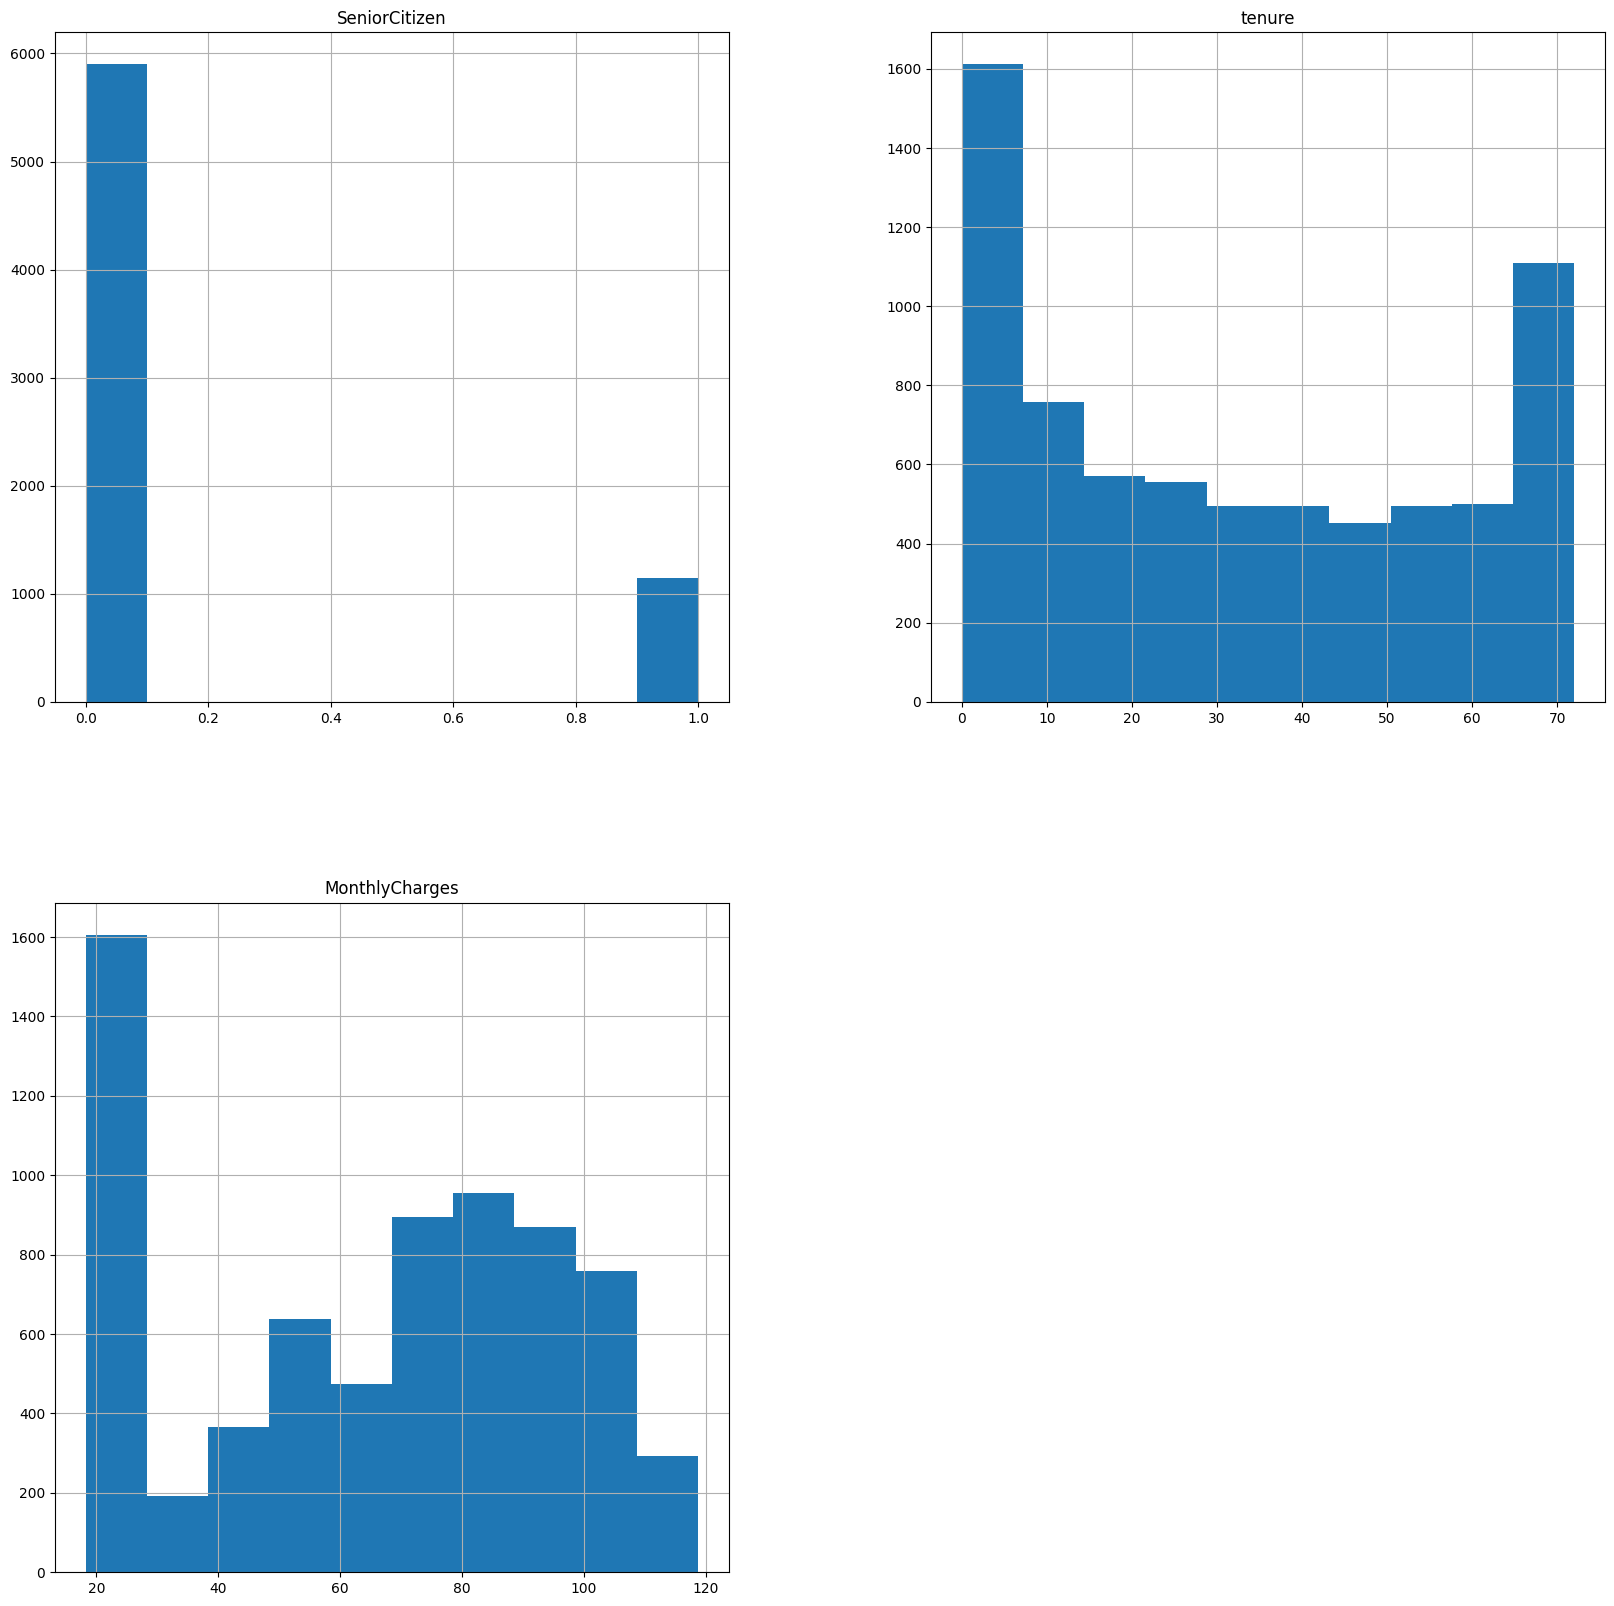

In [226]:
#distribution of numerical columns
combined_df.hist(figsize= (20, 20))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

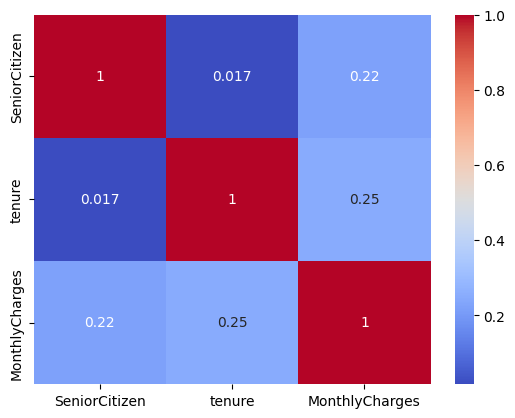

In [227]:
#filetering the numerical columns into a new dataframe
numerical_df= combined_df.select_dtypes(include=[np.number])
#creating a correlation matrix
corr_df= numerical_df.corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.show

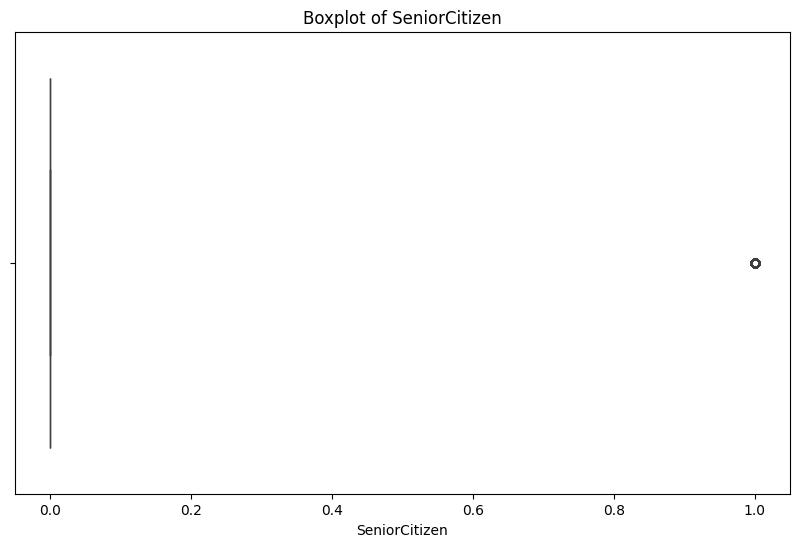

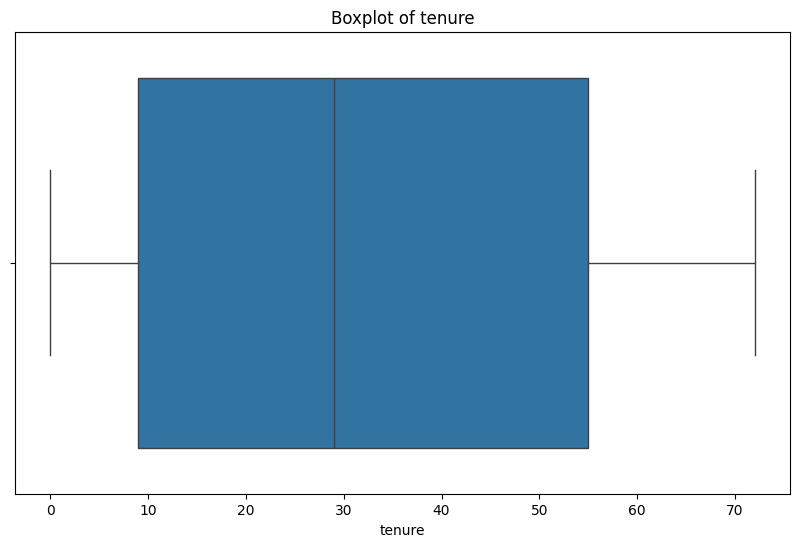

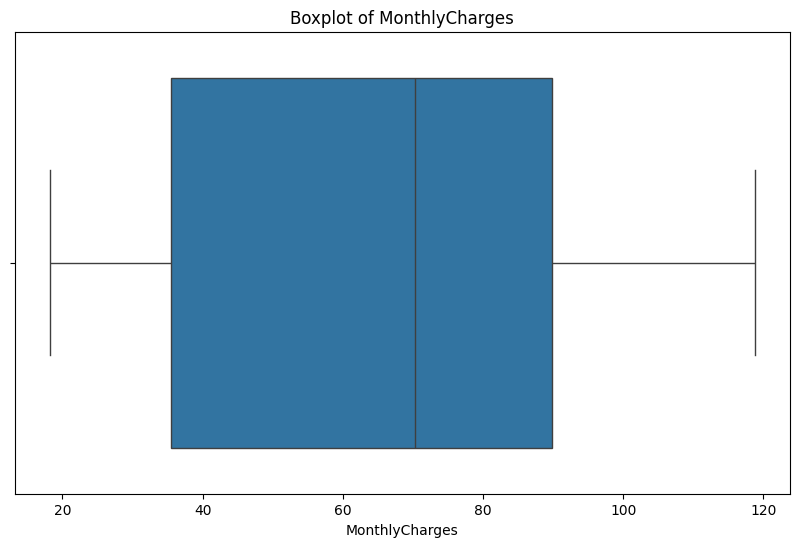

In [228]:

#Checking for outliers in the numerical columns
for col in numerical_df:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=combined_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

#### Observations

- Several columns where only 2 responses (True/False) where expected had more than 2 unique values
- There are fewer senior citizens (represented by 1) than non-senior citizens (represented by 0)
- Tenure has a bimodal U-shaped distribution with the 2 peaks at the extreme ends
- The monthly charges is skewed to the left and also has three peaks; the highest at the very beginning and the others in the middle region of the distribution.
- There's weak correlation amongst the numerical columns but the highest correlation was between Tenure andn Monthly Charges at 0.25
- The numerical columns (tenure and MonthlyCharges) had no outliers. Senior Citizen is made up of 0,1 represent No and Yes.


## Exploratory Data Analysis 

The section involves restructuring our data appropriately, by cleaning it and then performing some analysis on it; hopefully to derive meaning from insights from it.



In [229]:
#handling data types
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6774 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    6392 non-null   object 
 10  OnlineBackup      6392 non-null   object 
 11  DeviceProtection  6392 non-null   object 
 12  TechSupport       6392 non-null   object 
 13  StreamingTV       6392 non-null   object 
 14  StreamingMovies   6392 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Ensuring Data Consistency

The aim to make sure the data is cleaned so as to have the same/consistent formats for the different variables. Here also the right data types would be applied to the different columns.

Several columns (Partner, Dependents, PhoneService, MultipleLines, etc), have both Yes & No as well as True & False to represent the same thing. To ensure data consistency the Yes & No were replaced with True and False

The TotalCharges had a blank entry which prevernted it from being identified as a float thus the the blank was replaced with NaN.

##### Viewing rhe Unique values in each column

In [230]:
#defining a function to print the unique values and frequency for a column in a dataframe

def unique(df, col):
    return df[col].value_counts()

In [231]:
unique(combined_df, 'gender')

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [232]:
unique(combined_df, 'SeniorCitizen')

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [233]:
unique(combined_df, 'Partner')

Partner
No       2103
Yes      1940
False    1538
True     1462
Name: count, dtype: int64

In [234]:
unique(combined_df, 'Dependents')

Dependents
No       2863
False    2070
Yes      1180
True      930
Name: count, dtype: int64

In [235]:
unique(combined_df, 'PhoneService')

PhoneService
Yes      3630
True     2731
No        413
False     269
Name: count, dtype: int64

In [236]:
unique(combined_df, 'MultipleLines')

MultipleLines
No                  1953
Yes                 1677
False               1437
True                1294
No phone service     413
Name: count, dtype: int64

In [237]:
unique(combined_df, 'InternetService')

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [238]:
unique(combined_df, 'OnlineSecurity')

OnlineSecurity
No                     2020
False                  1478
Yes                    1148
No internet service     875
True                    871
Name: count, dtype: int64

In [239]:
unique(combined_df, 'OnlineBackup')

OnlineBackup
No                     1768
Yes                    1400
False                  1320
True                   1029
No internet service     875
Name: count, dtype: int64

In [240]:
unique(combined_df, 'DeviceProtection')

DeviceProtection
No                     1799
Yes                    1369
False                  1296
True                   1053
No internet service     875
Name: count, dtype: int64

In [241]:
unique(combined_df, 'OnlineBackup')

OnlineBackup
No                     1768
Yes                    1400
False                  1320
True                   1029
No internet service     875
Name: count, dtype: int64

In [242]:
unique(combined_df, 'TechSupport')

TechSupport
No                     1997
False                  1476
Yes                    1171
No internet service     875
True                    873
Name: count, dtype: int64

In [243]:
unique(combined_df, 'StreamingMovies')

StreamingMovies
No                     1635
Yes                    1533
True                   1199
False                  1150
No internet service     875
Name: count, dtype: int64

In [244]:
unique(combined_df, 'StreamingTV')

StreamingTV
No                     1620
Yes                    1548
False                  1190
True                   1159
No internet service     875
Name: count, dtype: int64

In [245]:
unique(combined_df, 'Contract')

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [246]:
unique(combined_df, 'OnlineBackup')

OnlineBackup
No                     1768
Yes                    1400
False                  1320
True                   1029
No internet service     875
Name: count, dtype: int64

In [247]:
unique(combined_df, 'PaperlessBilling')

PaperlessBilling
Yes      2395
True     1776
No       1648
False    1224
Name: count, dtype: int64

In [248]:
unique(combined_df, 'PaymentMethod')

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [249]:
unique(combined_df, 'Churn')

Churn
False    2219
No       1487
True      780
Yes       556
Name: count, dtype: int64

In [250]:
unique(combined_df, 'MonthlyCharges')

MonthlyCharges
20.000000     43
20.250000     39
19.750000     39
20.050000     37
19.500000     32
              ..
88.400002      1
107.650002     1
109.599998     1
34.500000      1
30.050000      1
Name: count, Length: 2351, dtype: int64

In [251]:
unique(combined_df, 'TotalCharges')

TotalCharges
19.75          7
               6
20.25          5
20.450001      5
20.2           5
              ..
3520.75        1
2416.550049    1
2654.050049    1
7904.25        1
301.55         1
Name: count, Length: 6791, dtype: int64

##### String data cleaning involving Boolean value columns and Total Charges

In [252]:
# replacing the ' ' with Nan within the TotalCharges column
combined_df['TotalCharges'] = pd.to_numeric(combined_df['TotalCharges'], errors= 'coerce')


In [253]:
#making a list of columns that are comprised of boolean values and yes and no entries
yes_no_columns= ['Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn' ]

In [254]:
#replacing the Yes and No with True and False (boolean values)
def yes_no_replace(df, col):
    df[col] = df[col].replace({'Yes': True, 'No': False, 'No internet service' : False, 'No phone service' : False})
    return df


# Apply the function to each column in the  yes_no_columns' list
for col in yes_no_columns:
    combined_df = yes_no_replace(combined_df, col)

#viewing the yes_no_columns to see on ensure unique responses
combined_df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
MultipleLines,6774,2,False,3803
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,6392,2,False,4373
OnlineBackup,6392,2,False,3963
DeviceProtection,6392,2,False,3970
TechSupport,6392,2,False,4348
StreamingTV,6392,2,False,3685
StreamingMovies,6392,2,False,3660


In [255]:
#assigning the columns with their appropriate data types

combined_df['gender'] = combined_df['gender'].astype('category')
combined_df['Partner'] = combined_df['Partner'].astype('category')
combined_df['Dependents'] = combined_df['Dependents'].astype('category')
combined_df['PhoneService'] = combined_df['PhoneService'].astype('category')
combined_df['MultipleLines'] = combined_df['MultipleLines'].astype('category')
combined_df['InternetService'] = combined_df['InternetService'].astype('category')
combined_df['OnlineSecurity'] = combined_df['OnlineSecurity'].astype('category')
combined_df['OnlineBackup'] = combined_df['OnlineBackup'].astype('category')
combined_df['DeviceProtection'] = combined_df['DeviceProtection'].astype('category')
combined_df['TechSupport'] = combined_df['TechSupport'].astype('category')
combined_df['StreamingTV'] = combined_df['StreamingTV'].astype('category')
combined_df['StreamingMovies'] = combined_df['StreamingMovies'].astype('category')
combined_df['Contract'] = combined_df['Contract'].astype('category')
combined_df['PaperlessBilling'] = combined_df['PaperlessBilling'].astype('category')
combined_df['PaymentMethod'] = combined_df['PaymentMethod'].astype('category')
combined_df['TotalCharges'] = combined_df['TotalCharges'].astype('float')
combined_df['Churn'] = combined_df['Churn'].astype('category')

In [256]:
#verifying that the columns have been assigned with the appropriate data types
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     6774 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    6392 non-null   category
 10  OnlineBackup      6392 non-null   category
 11  DeviceProtection  6392 non-null   category
 12  TechSupport       6392 non-null   category
 13  StreamingTV       6392 non-null   category
 14  StreamingMovies   6392 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### Handling Missing Data

In [258]:
combined_df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn               2001
label                  0
dtype: int64

In [264]:
#A list of columns using internet services
internet_services= ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' ]

#checking for missing values within the internet services column
misin_serv= combined_df[internet_services].isna().any(axis=1)

#viewing the resulting dataframe of missing internet services
misin_df= combined_df[misin_serv]
misin_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,label
11,7469-LKBCI,Male,0,False,False,16,True,False,No,NaN,...,NaN,NaN,NaN,Two year,False,Credit card (automatic),18.950001,326.799988,False,df1
16,8191-XWSZG,Female,0,False,False,52,True,False,No,NaN,...,NaN,NaN,NaN,One year,False,Mailed check,20.650000,1022.950012,False,df1
21,1680-VDCWW,Male,0,True,False,12,True,False,No,NaN,...,NaN,NaN,NaN,One year,False,Bank transfer (automatic),19.799999,202.250000,False,df1
22,1066-JKSGK,Male,0,False,False,1,True,False,No,NaN,...,NaN,NaN,NaN,Month-to-month,False,Mailed check,20.150000,20.150000,True,df1
33,7310-EGVHZ,Male,0,False,False,1,True,False,No,NaN,...,NaN,NaN,NaN,Month-to-month,False,Bank transfer (automatic),20.200001,20.200001,False,df1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,6765-MBQNU,Female,0,True,False,26,True,True,No,NaN,...,NaN,NaN,NaN,One year,False,Mailed check,26.000000,684.049988,False,df1
2987,3769-MHZNV,Female,0,True,True,33,True,False,No,NaN,...,NaN,NaN,NaN,Two year,False,Mailed check,20.100000,670.349976,False,df1
2989,3308-MHOOC,Male,0,False,True,1,True,False,No,NaN,...,NaN,NaN,NaN,Month-to-month,True,Mailed check,19.200001,19.200001,False,df1
2993,2239-CFOUJ,Male,0,True,True,1,True,False,No,NaN,...,NaN,NaN,NaN,One year,False,Mailed check,20.400000,20.400000,False,df1


In [269]:
misin_mult= combined_df['MultipleLines'].isna()
misin_mult_df= combined_df[misin_mult]
misin_mult_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,label
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False,df1
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False,df1
7,6713-OKOMC,Female,0,False,False,10,False,NaN,DSL,True,...,False,False,False,Month-to-month,False,Mailed check,29.750000,301.899994,False,df1
20,8779-QRDMV,Male,1,False,False,1,False,NaN,DSL,False,...,False,False,True,Month-to-month,True,Electronic check,39.650002,39.650002,True,df1
27,8665-UTDHZ,Male,0,True,True,1,False,NaN,DSL,False,...,False,False,False,Month-to-month,False,Electronic check,30.200001,30.200001,True,df1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,9443-JUBUO,Male,0,True,True,72,False,NaN,DSL,True,...,True,True,True,Two year,True,Credit card (automatic),65.250000,4478.850098,False,df1
2990,2309-OSFEU,Male,0,False,False,10,False,NaN,DSL,False,...,False,False,True,Month-to-month,True,Mailed check,33.900002,298.450012,True,df1
2992,4177-JPDFU,Male,0,False,False,12,False,NaN,DSL,False,...,True,False,False,Month-to-month,False,Mailed check,34.000000,442.450012,False,df1
2994,8046-DNVTL,Male,0,True,False,62,False,NaN,DSL,True,...,True,False,False,Two year,True,Credit card (automatic),38.599998,2345.550049,False,df1


### Observations

- For the different internet services that each have 651 missing values, it can be observed that they each had No intenet service and as such cannot utilize any of the internet services. As a result, all of those missing values would be filled with False since they dont use such intenet services.


- For the MultipleLines column, all the rows that have missing values also had False for PhoneService indicating that since they don't have any phone service, they can't have multiple lines. Likewise, all of those missing values for MultipleLines would be filled with False.

- For the TotalCharges column that has 11 missing values, this is because the tenure for those entries is 0 as the customer hasn't lasted a month with the company and thus hasn't yet been billed. For those values, we can fill them with 0 

In [278]:
import numpy as np

# List of columns to fill missing values
columns_to_fill = ['MultipleLines'] + internet_services

# Fill missing values in the specified columns
for col in columns_to_fill:
    combined_df[col] = combined_df[col].replace('', np.nan)  
    combined_df[col] = combined_df[col].fillna(False)      

#Filling the missing values in the total charges column with 0
combined_df['TotalCharges'] = combined_df['TotalCharges'].fillna(0)

#checking for missing values
combined_df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn               2001
label                  0
dtype: int64

### Univariate Analysis

To gain a better appreciation of the data we have, we will perform a histogram on numerical columns and bar plots on the cateogrical columns. The Bar plot will help us to understand the frequency distribution of categories and identify any dominant or underrepresented categories whilst the histogram along with the boxplot will help us understand the distribution of numerical variables, identify skewness, and detect outliers.

<function matplotlib.pyplot.show(close=None, block=None)>

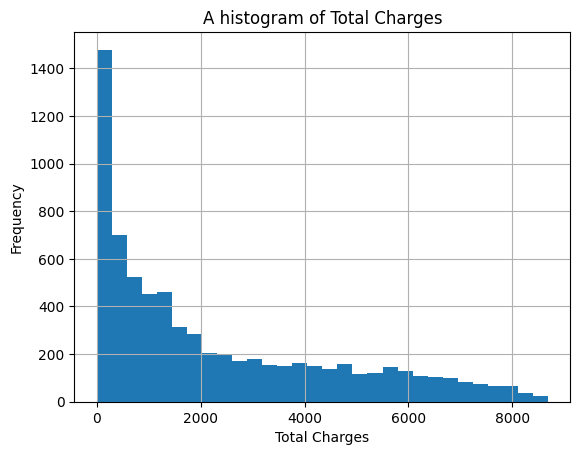

In [282]:
#distribution of numerical columns
combined_df['TotalCharges'].hist(bins=30)
plt.ylabel('Frequency')
plt.xlabel('Total Charges')
plt.title('A histogram of Total Charges')
plt.show

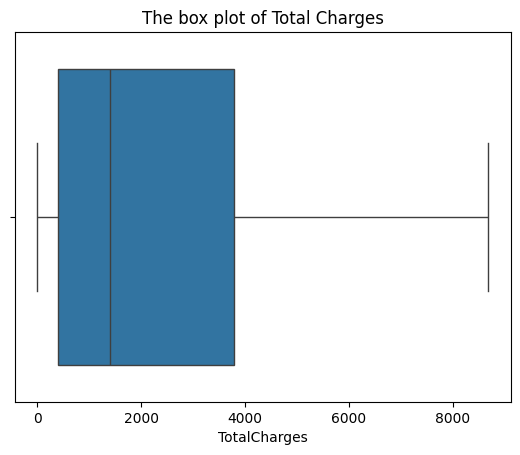

In [283]:
#detecting outliers in the total charges column
sns.boxplot(x= combined_df['TotalCharges'])
plt.title('The box plot of Total Charges')
plt.show()

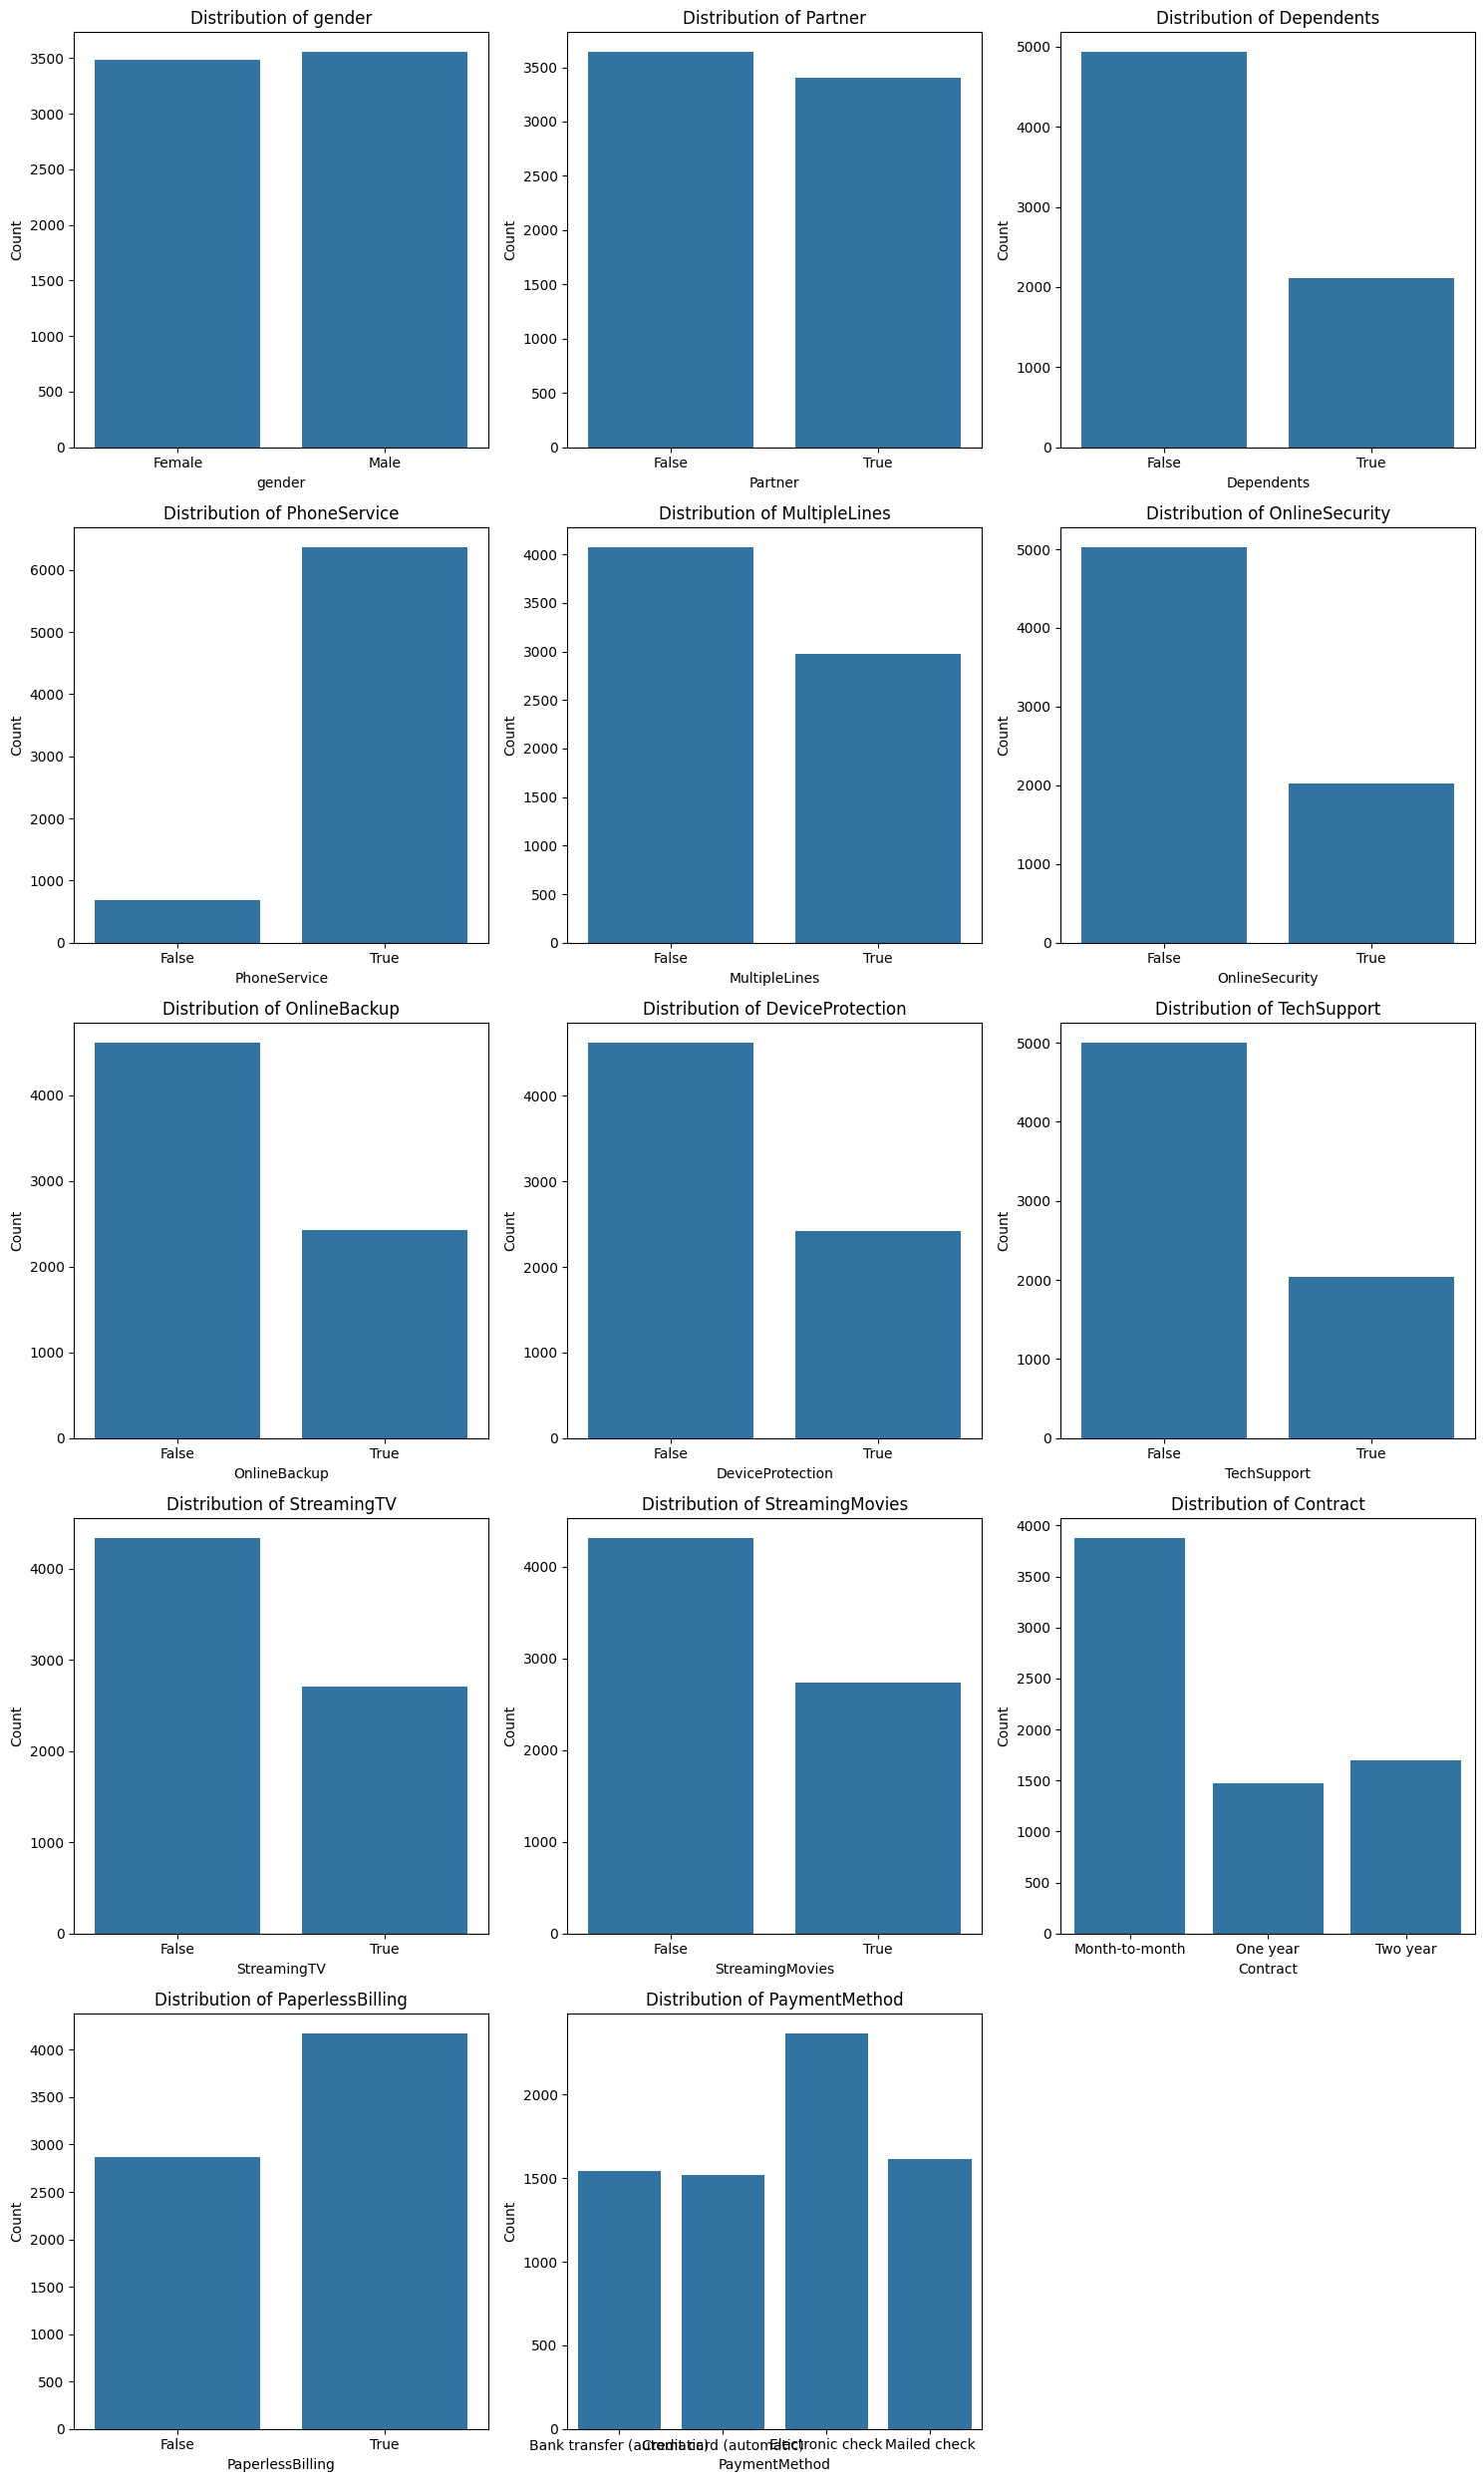

In [285]:
#bar plot for the categorical columns in combined_df
# A list of the categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                       'PaymentMethod']

# Determining the number of rows and columns for the subplot grid
num_cols = 3
num_rows = -(-len(categorical_columns) // num_cols)  

# Creating a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flattennig the axes array for easy iteration
axes = axes.flatten()

# Looping through each categorical column and plotting its value counts
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=combined_df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Removing any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()


#### Observations
Having already viewed the histogram of the other numerical columns, Total chages is the new additon after the dataset was cleaned. The distribution of Total Charges indicates that majority of people rack up charges at the very beginning of their dealing with the Telco company but there is a sharp decline and this downward trend persists to the very end meaning as charges build up, the number of customers paying those charges reduce.

### Bivariate Analysis

For the bivariate analysis, several types of analysis will be conducted: Numerical vs Numerical and Numerical vs Categorical. These analysis will be conducted using boxplots, correlation matrix and heatmaps.

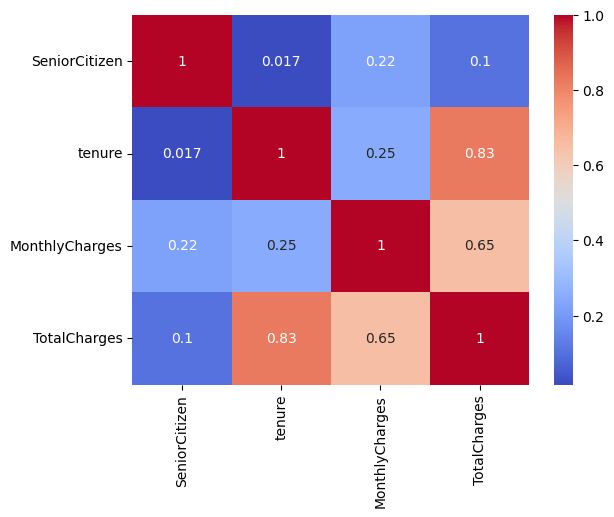

In [288]:
#List of numerical columns
numerical_df2= combined_df.select_dtypes(include= [np.number])

#correlation maatrix for the numerical columns
corr_df2= numerical_df2.corr()
sns.heatmap(corr_df2, annot=True, cmap= 'coolwarm')
plt.show()

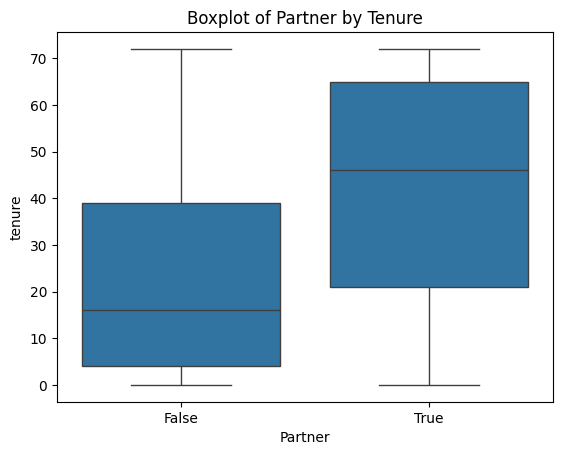

In [298]:
#boxplot for comparing partner and tenure
sns.boxplot(x= 'Partner', y= 'tenure', data= combined_df) 
plt.title('Boxplot of Partner by Tenure')
plt.show()

### Observations

#### Numerical vs Numerical
- The highest correlation was between tenure and total charges (0.83) followed by monthly charges and total charges (0.65). These were the only two correlation comparisms that had a value over 0.5. Additinoally, the correlation between tenure and senior citizen had the lowest correlation score (0.017)
- It makes sence that the highest correlation was between tenure and total charges (0.83) since the longer a customer stays with the company, the higher the total charges they woudl accumulate. Additionall, the higher a customers monthly charge, it is directly relates to fast their total charges would rise; especially if the customer stays with the company for a long time.
- The lowest relation was between whether a customer was a senior citizen and their total charges suggesting suggesting a weak relationship between the two.

#### Numerical vs Categorical
- This was a boxplot between tenure and partner. The median for customers who have partners was higher than that of those who don't have partners. With the median tenure of customers with partners being higher than those without partners, it suggests that customers with partners tend to stay with the company longer than customers without partners. This could be that customers with partners will tend to communicate more (by calling their partner) and would be more financially stable (with a combined household income)
